# Comparison with DELFTship

DELFTship [https://www.delftship.net/DELFTwp/] can calculate hydrostatics, includes standard vessel models, and can export to .obj. Perfect for a comparison of hydrostatics.

In DAVE the only true prinicpal hydrostatic calculations are the displacement and the center of buoyancy. All other values are derived from those. For example the KM value is derived from the change of the CoB given a finite rotation.

So the only two things we are checking here are the displacement and CoB position.

In [1]:
from DAVE import *
from DAVE.gui import *

s = Scene()

Equilibrium-core version = 1.0
default resource folders:
C:\Users\beneden\Miniconda3\envs\DAVE\lib\site-packages\DAVE\resources
C:\Users\beneden\DAVE_models
Blender found at: C:\Program Files\Blender Foundation\Blender 2.83\blender.exe
embedWindow(verbose=True): could not load k3d module, try:
> pip install k3d      # and if necessary:
> conda install nodejs


# Input

In [2]:
draft = 9.0

# Model construction

In [3]:
s.new_axis('Vessel')
s.new_visual('Visual', parent = 'Vessel', path = r'DELFTship demo 1 Z up.obj')
s.new_buoyancy('Buoyancy mesh', parent = 'Vessel')
s['Buoyancy mesh'].trimesh.load_obj(r'DELFTship demo 1 Z up.obj')

# Expected values

The values below are obtained from the hydrostatics report as obtained from DELFTship.

We are expecting the following hydrostatic properties:


```
Draft 	Displ FW 	Displ. 	LCB 	VCB 	TCB 	KMt 	KMl 	MCT 	TpCm
(m) 	(tonnes) 	(tonnes) 	(m) 	(m) 	(m) 	(m) 	(m) 	(t*m/cm) 	(t/cm)
9,000 	12135,3 	12438,7 	38,087 	5,381 	0,000 	11,838 	103,03 	146,34 	19,784

Draft 	Moulded draft, measured from baseline
Displ FW 	Displacement fresh water
Displ. 	Displacement
LCB 	Longitudinal center of buoyancy, measured from the aft perpendicular at X=0.0
VCB 	Vertical center of buoyancy
TCB 	Transverse center of buoyancy
KMt 	Transverse metacentric height
KMl 	Longitudinal metacentric height
MCT 	Moment to change trim one unit
TpCm 	Weight to change the immersion with one unit
```

In [4]:
s['Vessel'].position = (0.0, 0.0, -draft)   # Set the vessel draft
s.update()


mesh = s['Buoyancy mesh']

disp_m3 = mesh.displacement
LCB = mesh.cob_local[0]
VCB = mesh.cob_local[2]

In [5]:

print(f' Displacement: Expected = {12135.3} \n             :  Actual = {disp_m3:.1f}')

print(f' LCB:          Expected = {38.087} \n            :  Actual = {LCB:.3f}')
print(f' VCB:          Expected = {5.381} \n            :  Actual = {VCB:.3f}')



 Displacement: Expected = 12135.3 
             :  Actual = 12135.0
 LCB:          Expected = 38.087 
            :  Actual = 38.086
 VCB:          Expected = 5.381 
            :  Actual = 5.381


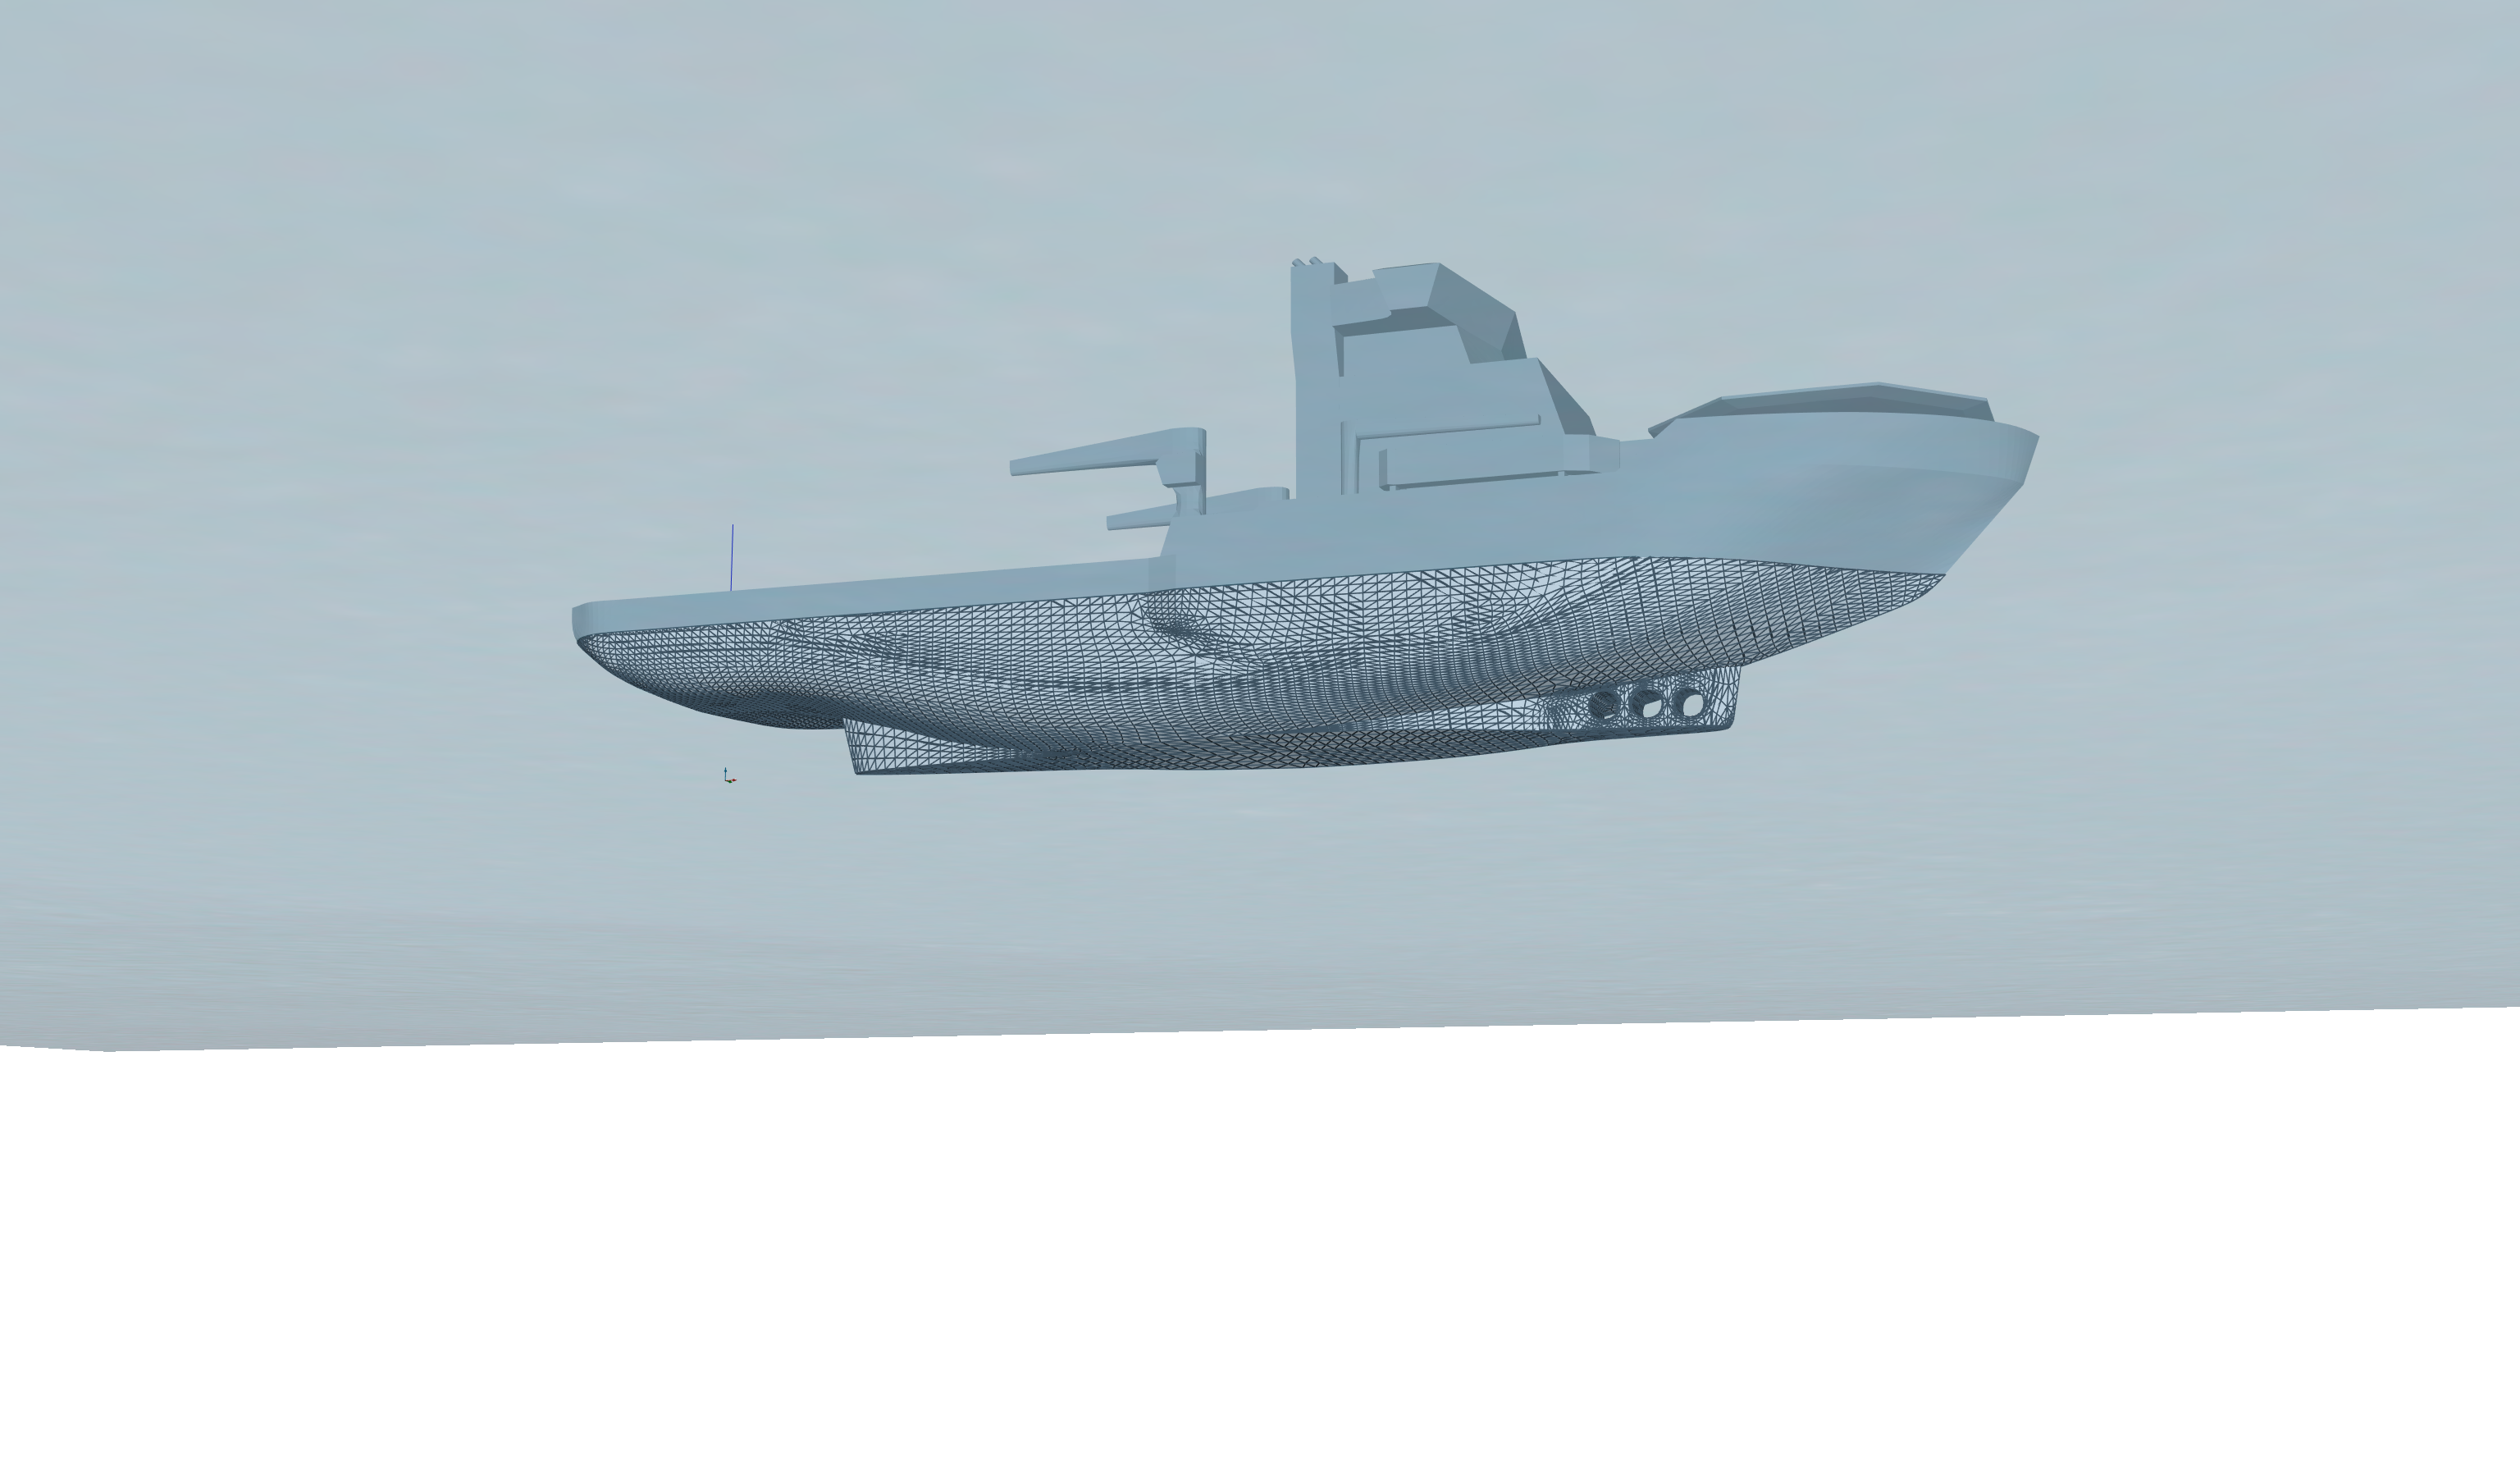

In [6]:
from DAVE.jupyter import *
show(s, sea = True, camera_pos = (103.25943261928589, -176.29674345634933, -37.488632590989724), lookat = (34.750635497954335, 17.854103574513903, -5.085842174276673), force_normalize = True, force_scale = 1.6)

# Different vessel position and heading

In [7]:
s['Vessel'].position = (20.0, 7.54, -draft)   # Set the vessel draft
s['Vessel'].rotation = (0,0,286.34)
s.update()


mesh = s['Buoyancy mesh']

disp_m3 = mesh.displacement
LCB = mesh.cob_local[0]
VCB = mesh.cob_local[2]


print(f' Displacement: Expected = {12135.3} \n             :  Actual = {disp_m3:.1f}')

print(f' LCB:          Expected = {38.087} \n            :  Actual = {LCB:.3f}')
print(f' VCB:          Expected = {5.381} \n            :  Actual = {VCB:.3f}')



 Displacement: Expected = 12135.3 
             :  Actual = 12135.0
 LCB:          Expected = 38.087 
            :  Actual = 38.086
 VCB:          Expected = 5.381 
            :  Actual = 5.381


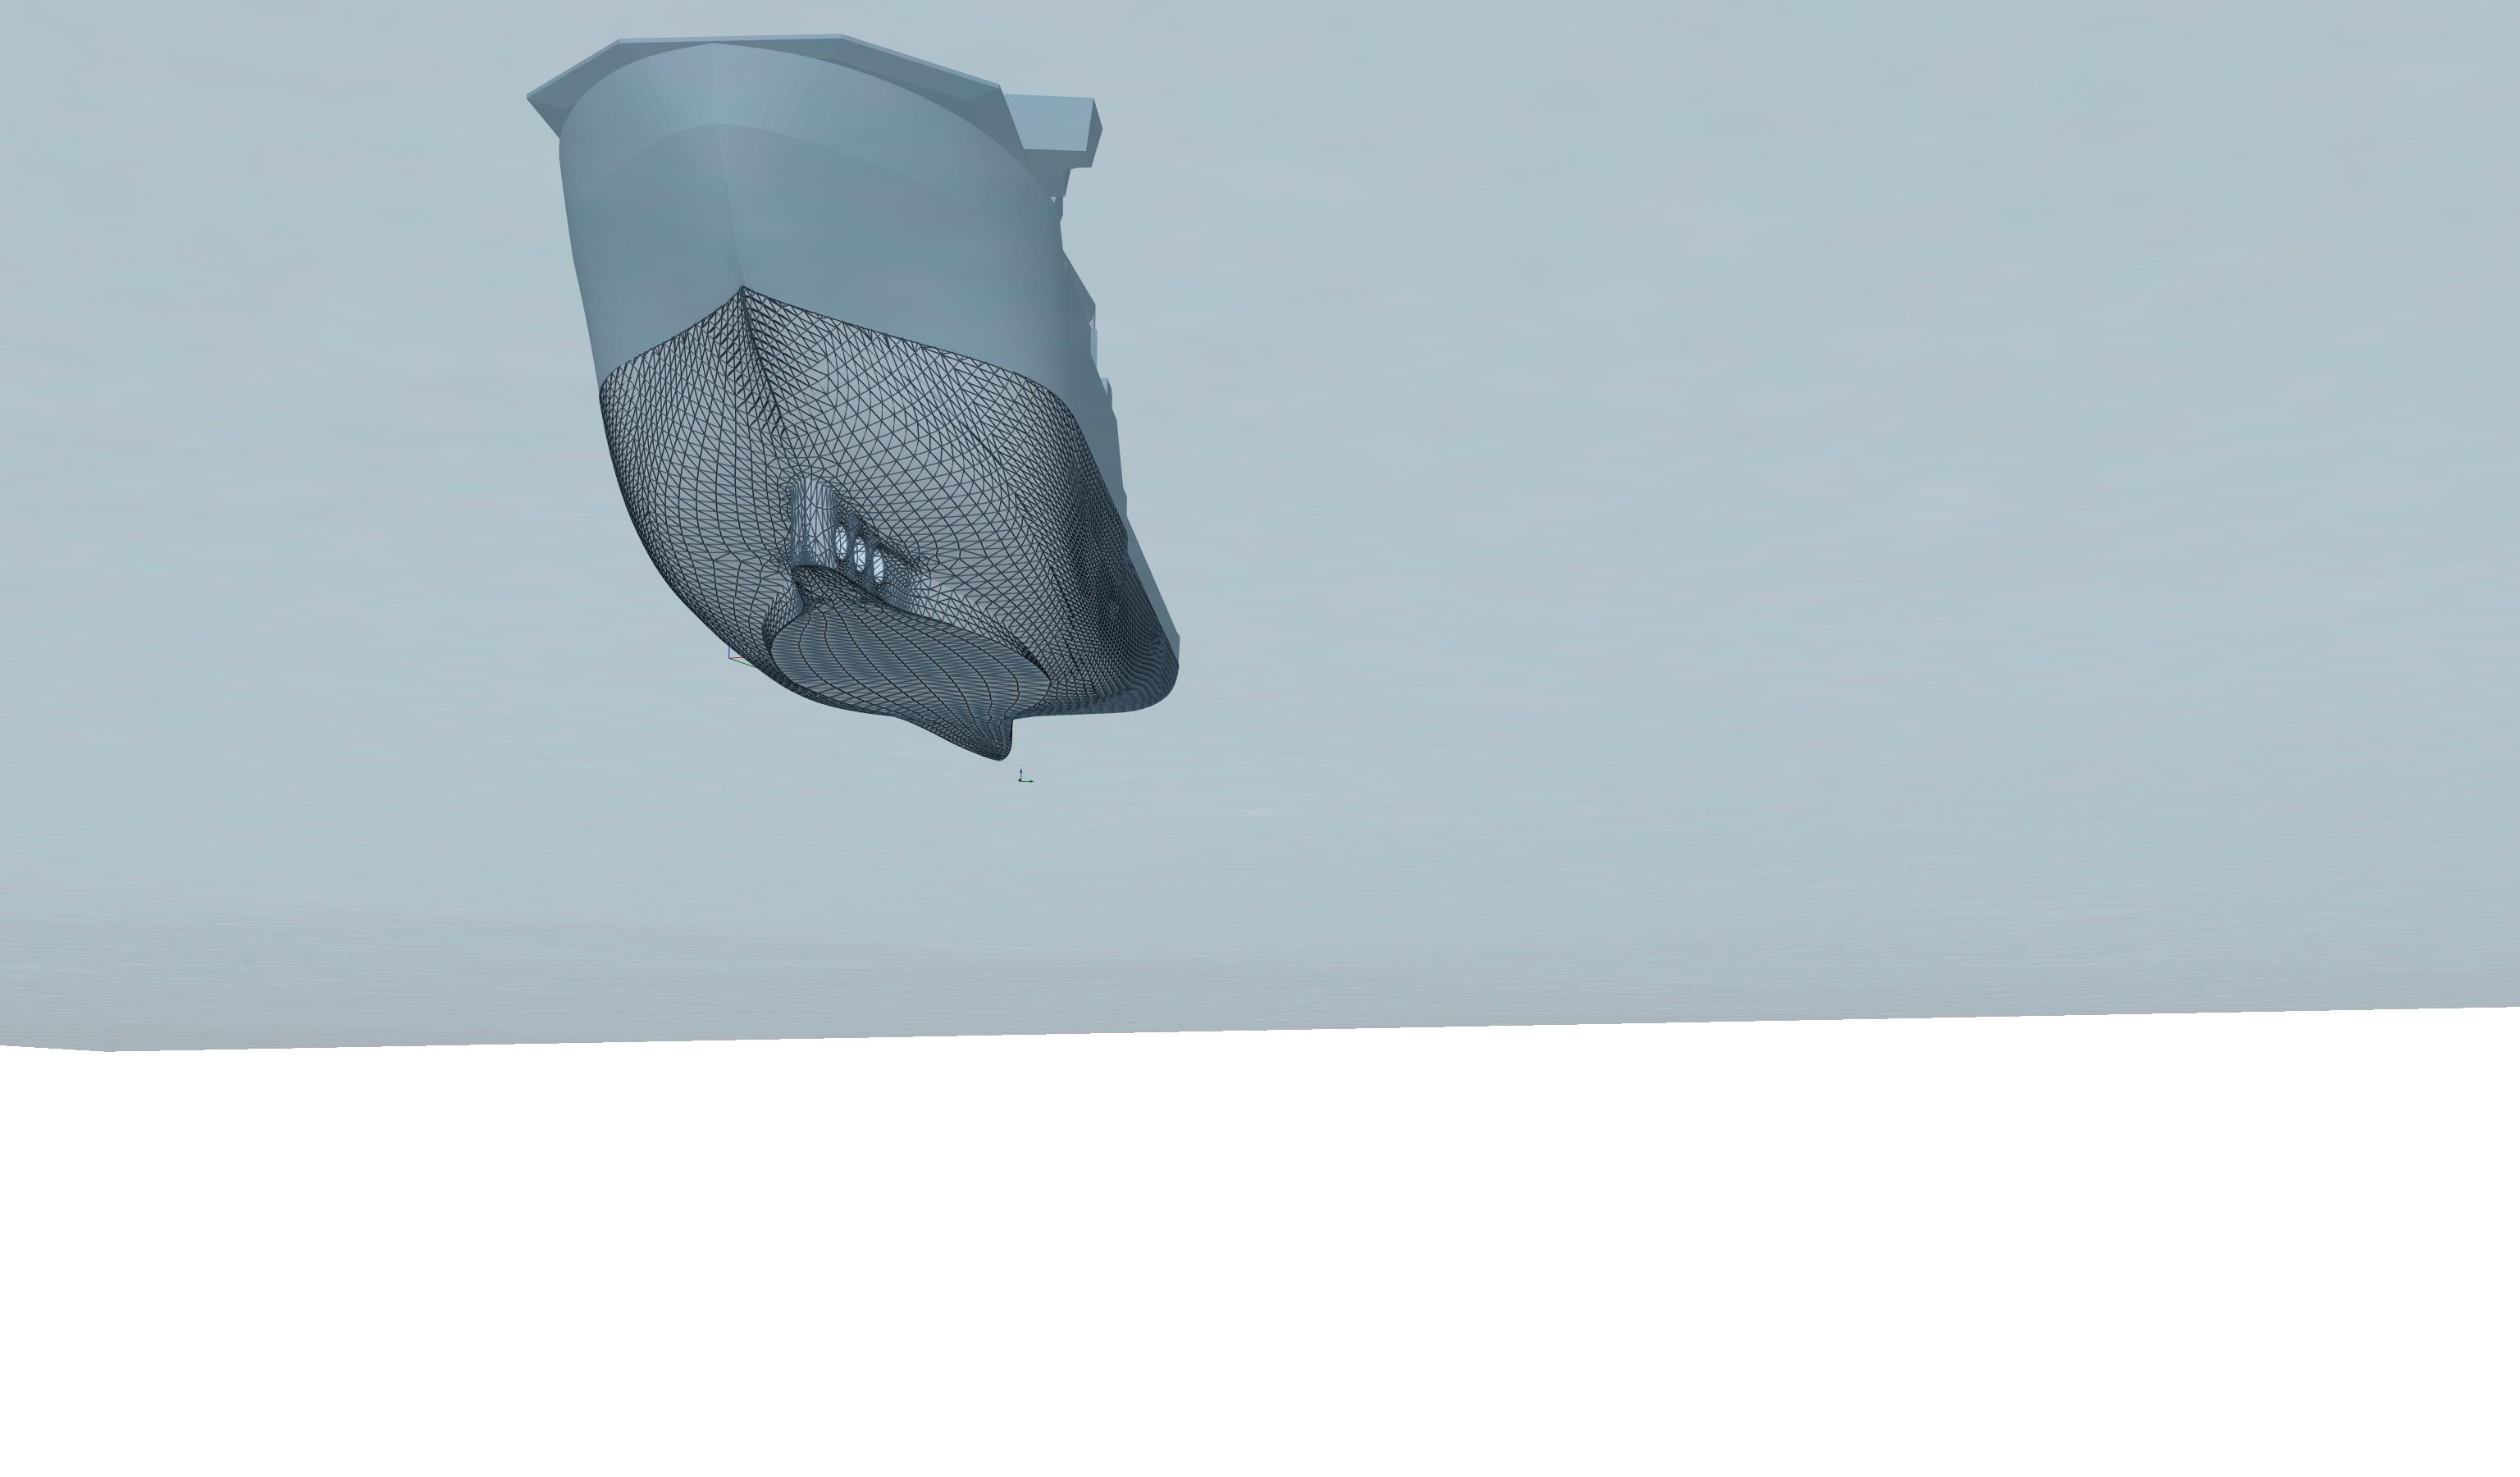

In [8]:
show(s, sea = True, camera_pos = (103.25943261928589, -176.29674345634933, -37.488632590989724), lookat = (34.750635497954335, 17.854103574513903, -5.085842174276673), force_normalize = True, force_scale = 1.6)